<a href="https://colab.research.google.com/github/samuelcoflo/Analitica-de-Negocios/blob/main/Metodos_KNN_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Cargar las librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Para no tener que cargar el archivo
from google.colab import drive
drive.mount('/content/drive')

#Prestamo Interbibliotecario
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


Mounted at /content/drive


1. Cargo datos

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Esta es la matriz de correlacion:
                  Edad  Ingresos   Egresos  Monto (EAD)    PreApr
Edad         1.000000 -0.003647 -0.008714    -0.002399  0.005044
Ingresos    -0.003647  1.000000  0.892740     0.816212  0.594411
Egresos     -0.008714  0.892740  1.000000     0.527164  0.490899
Monto (EAD) -0.002399  0.816212  0.527164     1.000000  0.553089
PreApr       0.005044  0.594411  0.490899     0.553089  1.000000


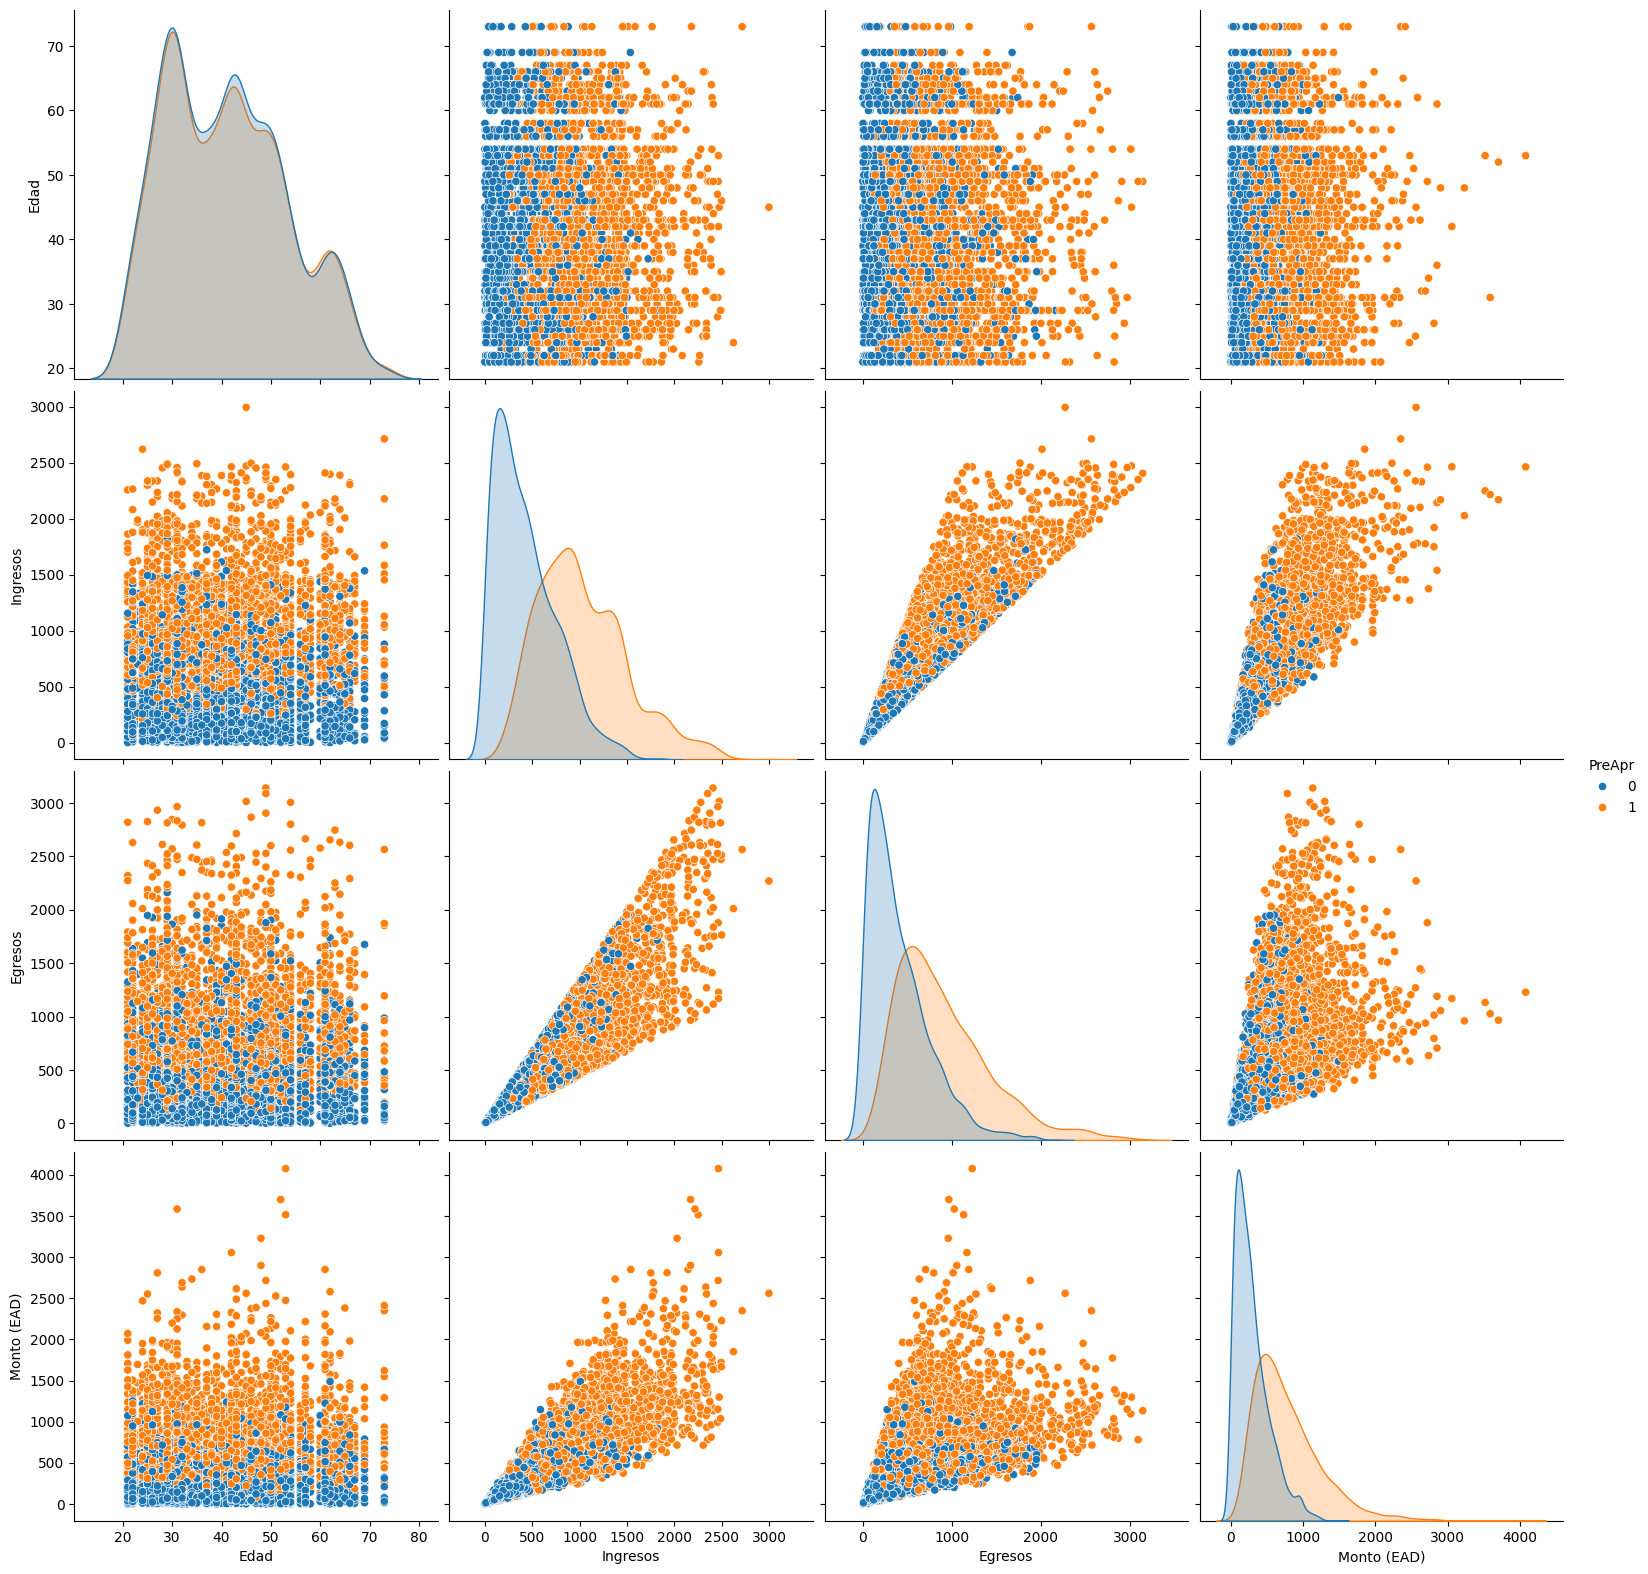

In [ ]:
nxl='/content/drive/MyDrive/Analitica de Negocios/0. SolicitantesCrédito(USD).xlsx'
XDB=pd.read_excel(nxl,sheet_name=1)
XDB=XDB.dropna() #Borra las celdas vacias
XDB.head(100)

XDB=XDB[['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)', 'PreApr']]

sns.pairplot(XDB, hue='PreApr', size=4,vars=['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)'])

#Para confirmar la buena correlacion
corr = XDB.corr()
print("Esta es la matriz de correlacion:\n",corr)

#Se procede con la configuracion de los datos de entrada y salida
XD=np.array(XDB.iloc[:,0:4])      #Toma las variables de entrada, Edad, Ingresos, Egresos, Monto(EAD)
yd=np.array(XDB.iloc[:,4])        #PreApr

2. Implemento KNN

Esta es la matriz de confusion:
 [[2437  522]
 [ 648 2235]]
La Exactitud es: 0.7997261211913728
La Sensibilidad es: 0.7752341311134235
La Especificidad es: 0.8235890503548496
El modelo me presta? [1]


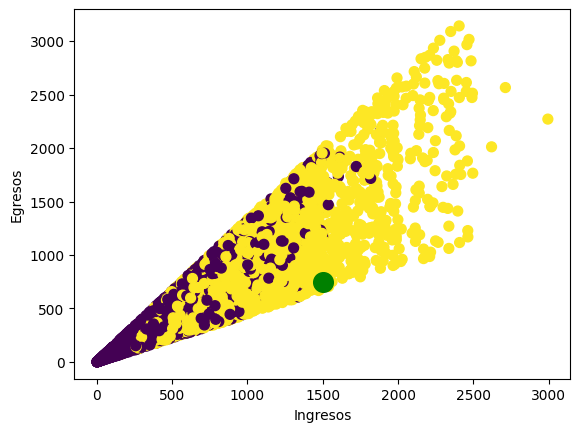

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10) #Tomar 10 Vecinos
mknn.fit(XD,yd) #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusion:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Esp=VN/(VN+FP)
print("La Exactitud es:",Exac)
print("La Sensibilidad es:",Sen)
print("La Especificidad es:",Esp)

#Modelo: Me vas a prestar o no?
XDP=np.array([[50,1500,750,500]])
ydpp=mknn.predict(XDP)
print("El modelo me presta?",ydpp)

#Las graficas siempre se hacen con las variables que tienen mas correlación
plt.scatter(XD[:,1],XD[:,2],c=yd,s=50,cmap='viridis')
plt.scatter(XDP[:,1],XDP[:,2],marker='o',s=200,facecolors='green')
plt.xlabel('Ingresos');plt.ylabel('Egresos')
plt.show()

3. Construyo KNN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedo el primer solicitante 2
Donde quedo el segundo solicitante 4
Donde quedo el tercer solicitante 0


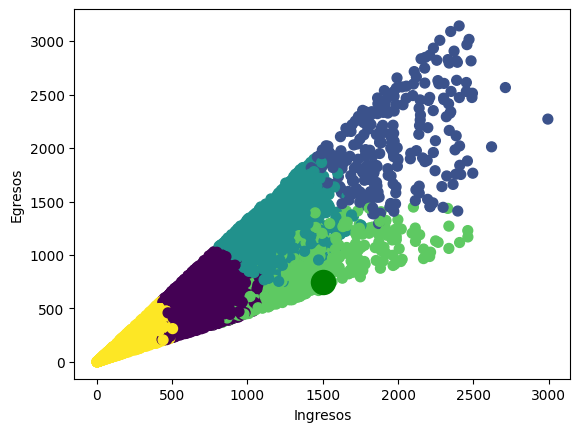

En que cluster estoy? [2]
El número de Negados para el cluster 1 es: 11
El número de Aprobados para el cluster 1 es: 261
El porcentaje de Negados para el cluster 1 es: 0.04044117647058824
El porcentaje de Aprobados para el cluster 1 es: 0.9595588235294118
El número de Negados para el cluster 2 es: 226
El número de Aprobados para el cluster 2 es: 745
El porcentaje de Negados para el cluster 2 es: 0.23274974253347064
El porcentaje de Aprobados para el cluster 2 es: 0.7672502574665293
El número de Negados para el cluster 1 es: 1806
El número de Aprobados para el cluster 1 es: 269
El porcentaje de Negados para el cluster 1 es: 0.8703614457831326
El porcentaje de Aprobados para el cluster 1 es: 0.12963855421686746
Las caracteristicas sociodemograficas de cada cluster:
 [[  41.13045611  700.94181927  594.22875091  529.66765171]
 [  40.90441176 1930.5114329  2026.03599101 1140.80106045]
 [  40.96395469 1167.56457775 1226.93772674  655.30527084]
 [  40.81030928 1375.63224691  823.62006048 1499

In [ ]:
np.random.seed(42) #Para que a todos nos de el mismo modelo

mkm=KMeans(n_clusters=5,init='random',random_state=42) #5 Clusters o montoncitos de datos
mkm.fit(XD,yd)
labels=mkm.labels_ #Donde quedaron clasificados cada uno de los solicitantes de créditos
print("Donde quedo el primer solicitante",labels[0,])
print("Donde quedo el segundo solicitante",labels[1,])
print("Donde quedo el tercer solicitante",labels[2,])

#Mapeo de los clusters - Como quedaron clasificados los solicitantes
plt.scatter(XD[:,1],XD[:,2],c=labels,s=50,cmap='viridis')
plt.scatter(XDP[:,1],XDP[:,2],marker='o',s=300,facecolors='green')
plt.xlabel('Ingresos');plt.ylabel('Egresos')
plt.show()

#Donde quedé yo?
XDP=np.array([[50,1500,750,500]])
ydpp2=mkm.predict(XDP)
print("En que cluster estoy?",ydpp2)

#Cual es el procentaje de Preaprobados y Negados del cluster 1
c10=len(np.where((labels==1) & (yd==0))[0])
print("El número de Negados para el cluster 1 es:",c10)
c11=len(np.where((labels==1) & (yd==1))[0])
print("El número de Aprobados para el cluster 1 es:",c11)
print("El porcentaje de Negados para el cluster 1 es:",c10/(c10+c11))
print("El porcentaje de Aprobados para el cluster 1 es:",c11/(c10+c11))

#Cual es el procentaje de Preaprobados y Negados del cluster 2
c20=len(np.where((labels==2) & (yd==0))[0])
print("El número de Negados para el cluster 2 es:",c20)
c21=len(np.where((labels==2) & (yd==1))[0])
print("El número de Aprobados para el cluster 2 es:",c21)
print("El porcentaje de Negados para el cluster 2 es:",c20/(c20+c21))
print("El porcentaje de Aprobados para el cluster 2 es:",c21/(c20+c21))

#Cual es el procentaje de Preaprobados y Negados del cluster 5
c50=len(np.where((labels==4) & (yd==0))[0])
print("El número de Negados para el cluster 1 es:",c50)
c51=len(np.where((labels==4) & (yd==1))[0])
print("El número de Aprobados para el cluster 1 es:",c51)
print("El porcentaje de Negados para el cluster 1 es:",c50/(c50+c51))
print("El porcentaje de Aprobados para el cluster 1 es:",c51/(c50+c51))

#Cual es la caracteristica sociodemografica de cada cluster
clusters=mkm.cluster_centers_
print("Las caracteristicas sociodemograficas de cada cluster:\n",clusters)

Construir KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedo el primer solicitante 2
Donde quedo el segundo solicitante 4
Donde quedo el tercer solicitante 0


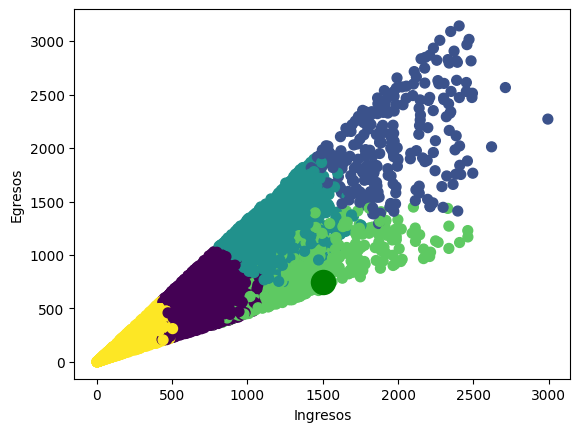

En que cluster estoy? [2]
El número de Negados para el cluster 1 es: 11
El número de Aprobados para el cluster 1 es: 261
El porcentaje de Negados para el cluster 1 es: 0.04044117647058824
El porcentaje de Aprobados para el cluster 1 es: 0.9595588235294118
El número de Negados para el cluster 2 es: 226
El número de Aprobados para el cluster 2 es: 745
El porcentaje de Negados para el cluster 2 es: 0.23274974253347064
El porcentaje de Aprobados para el cluster 2 es: 0.7672502574665293
El número de Negados para el cluster 1 es: 1806
El número de Aprobados para el cluster 1 es: 269
El porcentaje de Negados para el cluster 1 es: 0.8703614457831326
El porcentaje de Aprobados para el cluster 1 es: 0.12963855421686746
Las caracteristicas sociodemograficas de cada cluster:
 [[  41.13045611  700.94181927  594.22875091  529.66765171]
 [  40.90441176 1930.5114329  2026.03599101 1140.80106045]
 [  40.96395469 1167.56457775 1226.93772674  655.30527084]
 [  40.81030928 1375.63224691  823.62006048 1499

In [ ]:
np.random.seed(42) #Para que a todos nos de el mismo modelo

mkm=KMeans(n_clusters=5,init='random',random_state=42) #5 Clusters o montoncitos de datos
mkm.fit(XD,yd)
labels=mkm.labels_ #Donde quedaron clasificados cada uno de los solicitantes de créditos
print("Donde quedo el primer solicitante",labels[0,])
print("Donde quedo el segundo solicitante",labels[1,])
print("Donde quedo el tercer solicitante",labels[2,])

#Mapeo de los clusters - Como quedaron clasificados los solicitantes
plt.scatter(XD[:,1],XD[:,2],c=labels,s=50,cmap='viridis')
plt.scatter(XDP[:,1],XDP[:,2],marker='o',s=300,facecolors='green')
plt.xlabel('Ingresos');plt.ylabel('Egresos')
plt.show()

#Donde quedé yo?
XDP=np.array([[50,1500,750,500]])
ydpp2=mkm.predict(XDP)
print("En que cluster estoy?",ydpp2)

#Cual es el procentaje de Preaprobados y Negados del cluster 1
c10=len(np.where((labels==1) & (yd==0))[0])
print("El número de Negados para el cluster 1 es:",c10)
c11=len(np.where((labels==1) & (yd==1))[0])
print("El número de Aprobados para el cluster 1 es:",c11)
print("El porcentaje de Negados para el cluster 1 es:",c10/(c10+c11))
print("El porcentaje de Aprobados para el cluster 1 es:",c11/(c10+c11))

#Cual es el procentaje de Preaprobados y Negados del cluster 2
c20=len(np.where((labels==2) & (yd==0))[0])
print("El número de Negados para el cluster 2 es:",c20)
c21=len(np.where((labels==2) & (yd==1))[0])
print("El número de Aprobados para el cluster 2 es:",c21)
print("El porcentaje de Negados para el cluster 2 es:",c20/(c20+c21))
print("El porcentaje de Aprobados para el cluster 2 es:",c21/(c20+c21))

#Cual es el procentaje de Preaprobados y Negados del cluster 5
c50=len(np.where((labels==4) & (yd==0))[0])
print("El número de Negados para el cluster 1 es:",c50)
c51=len(np.where((labels==4) & (yd==1))[0])
print("El número de Aprobados para el cluster 1 es:",c51)
print("El porcentaje de Negados para el cluster 1 es:",c50/(c50+c51))
print("El porcentaje de Aprobados para el cluster 1 es:",c51/(c50+c51))

#Cual es la caracteristica sociodemografica de cada cluster
clusters=mkm.cluster_centers_
print("Las caracteristicas sociodemograficas de cada cluster:\n",clusters)

